# 📊 Iris Flower Classification

<img src="../images/Iris.png" alt="Iris Dataset" width="700"/>

---

## 📝 Project Overview
Build an end‐to‐end machine learning pipeline to classify Iris flower species based on sepal and petal measurements. This notebook will guide you through exploratory data analysis, preprocessing experiments, model prototyping, hyperparameter tuning, and final selection.

## 🎯 Objectives
1. **Load & inspect** the Iris dataset (150 samples, 4 numeric features, 3 species).  
2. **Visualize** feature distributions, relationships, and correlations.  
3. **Experiment** with data preprocessing: scaling, train/test split.  
4. **Prototype** baseline classifiers (Logistic Regression, k-NN, SVM, Random Forest) using cross-validation.  
5. **Optimize** top models via GridSearchCV and compare performance.  
6. **Summarize** results and identify the best model for production.

## 📂 Notebook Structure
1. **Data Loading & Inspection**  
2. **Exploratory Data Analysis (EDA)**  
3. **Preprocessing Experiments**  
4. **Baseline Model Prototyping**  
5. **Hyperparameter Tuning**  
6. **Final Evaluation & Insights**  
7. **Next Steps** (outline what will go into `src/`)

## 1.📥 Data Loading & Inspection

### Load The Dataset

In [28]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('../data/Original_Iris_Dataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Analyze the Dataset 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Inspect Missing Values

In [32]:
#no null values

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
#no duplicates

df[df.duplicated()==True]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [34]:
#Remove the Id column because it is of no use in the dataset

df.drop('Id',axis=1,inplace=True)
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#change the names from  for eg Iris-setosa to Setosa etc

def fix_species(text):
    return text.split('-')[1].capitalize()

print(fix_species('Iris-setosa'))


Setosa


In [36]:
# We see that it works so we change it in the whole DataFrame

df['Species'] = df['Species'].apply(fix_species)
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [37]:
#So the Species are uniformly distributed which is good 

df['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

**There will be no Data Cleaning part because The kaggle Dataset is already cleaned up**

## 2. Exploratory Data Analysis (EDA)


In [38]:
palette = [
    "#4E79A7",  # blue
    "#F28E2B",  # orange
    "#E15759",  # red
    "#76B7B2",  # teal
    "#59A14F",  # green
    "#EDC948",  # yellow
]



df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

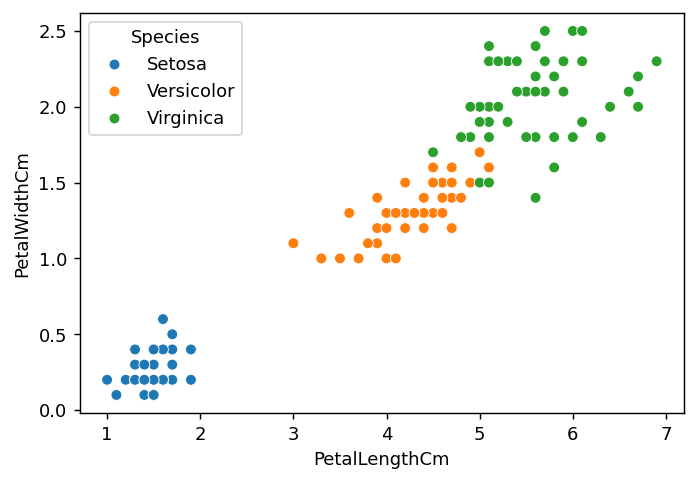

In [39]:
plt.figure(figsize=(6,4),dpi=130)
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)

<Axes: xlabel='Species', ylabel='count'>

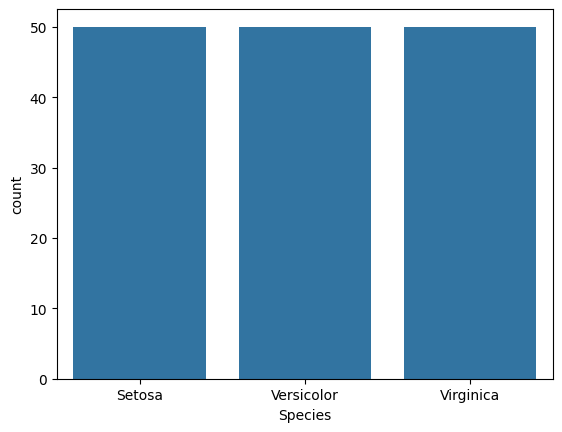

In [40]:
sns.countplot(x='Species',data=df)

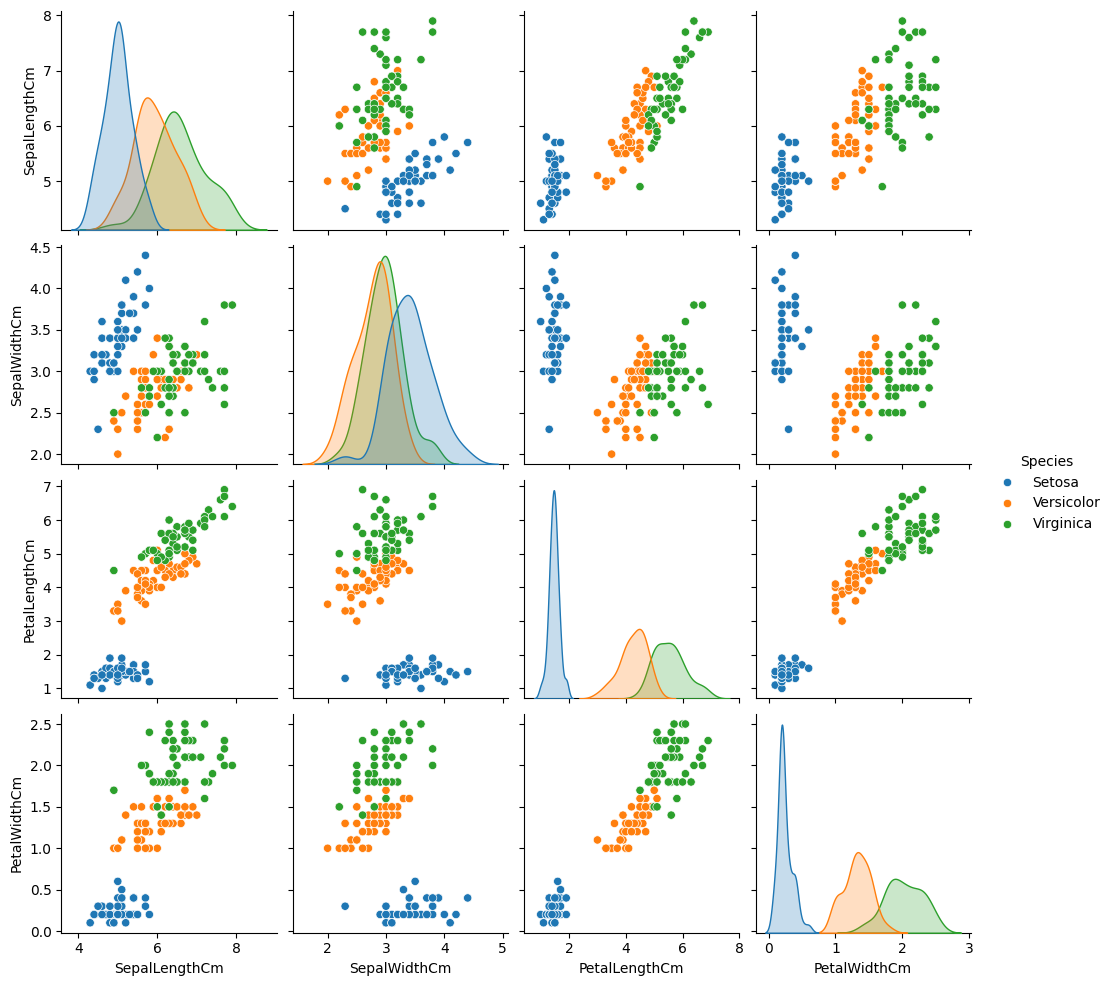

In [41]:
sns.pairplot(hue='Species',data=df)

<Axes: >

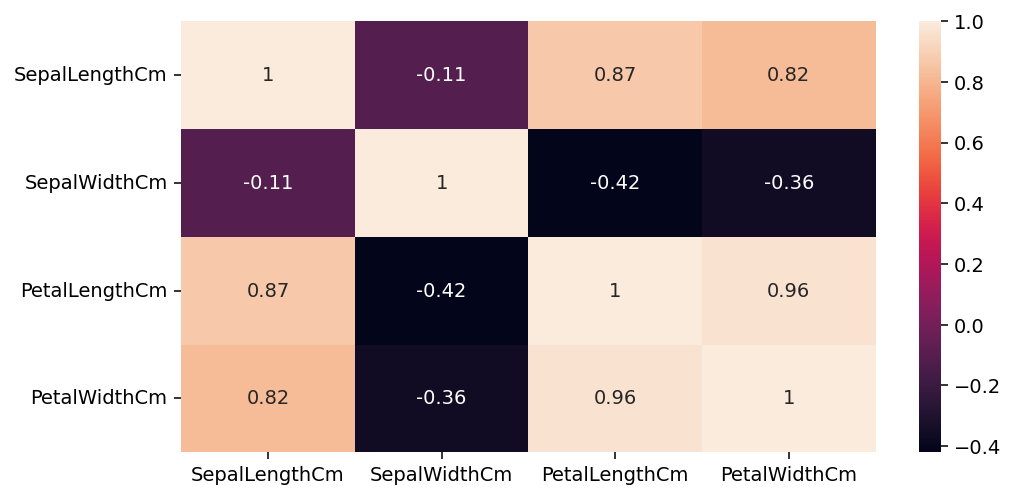

In [42]:
plt.figure(figsize=(8,4),dpi=140)
sns.heatmap(df.drop('Species',axis=1).corr(),annot=True)

#really high correlations between Petal and Sepal Lengths and Widths

## 3. Preprocessing & Train/Test Split

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('Species',axis=1)
y = df['Species']

In [45]:
scaler = StandardScaler()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



## 4. Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [76]:
log_model = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=5000)

In [50]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid= {'penalty':['l1','l2','elasticnet'],'C':[0.01,0.1,0.5,0.75,0.9,1]}

In [77]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [78]:
grid_model.fit(scaled_X_train,y_train)

c:\Users\mehdi\Documents\CodeAlpha_DS_projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mehdi\Documents\CodeAlpha_DS_projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mehdi\Documents\CodeAlpha_DS_projects\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\mehdi\Documents\CodeAlpha_DS_projects\.venv

,estimator,LogisticRegre...'multinomial')
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [79]:
grid_model.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [80]:
grid_pred = grid_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import accuracy_score ,  confusion_matrix ,ConfusionMatrixDisplay ,  classification_report

In [ ]:
log_acc = accuracy_score(y_test,grid_pred)

print(f'The accuracy of the model is {log_acc}')

The accuracy of the model is 0.98


In [82]:
print(confusion_matrix(y_test,grid_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [83]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



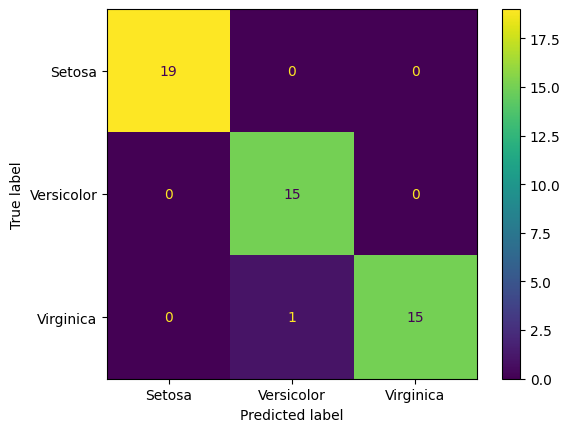

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test,grid_pred)

## 5. KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn_model = KNeighborsClassifier()

In [90]:
# To get an idea we plot the errors with respect to k to choose good values when using the GridSearch

errors=[]

for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train,y_train)
    model_pred = model.predict(scaled_X_test)
    error = 1 - accuracy_score(y_test,model_pred)
    errors.append(error)


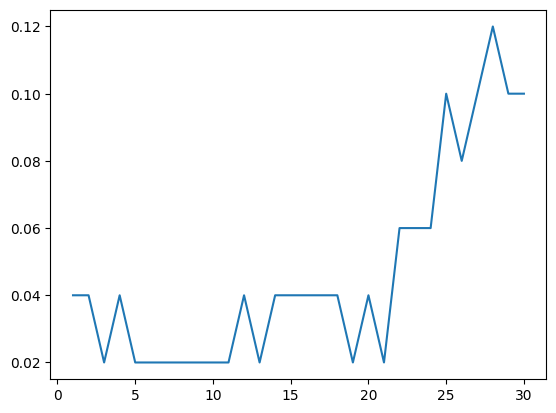

In [ ]:
plt.plot(range(1,31),errors)

#We can see there are lots of minimal points like the intervall between 5 and 10 and some other isolated points

In [92]:
param_grid ={'n_neighbors':[1,3,4,5,6,8,10,13,14,18,19]}

In [93]:
grid_model = GridSearchCV(knn_model,param_grid=param_grid)

In [94]:
grid_model.fit(scaled_X_train,y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [1, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [95]:
grid_model.best_params_

{'n_neighbors': 1}

In [96]:
grid_pred = grid_model.predict(scaled_X_test)

In [97]:
knn_acc = accuracy_score(y_test,grid_pred)
knn_acc

0.96

In [99]:
print(confusion_matrix(y_test,grid_pred))

[[19  0  0]
 [ 0 14  1]
 [ 0  1 15]]


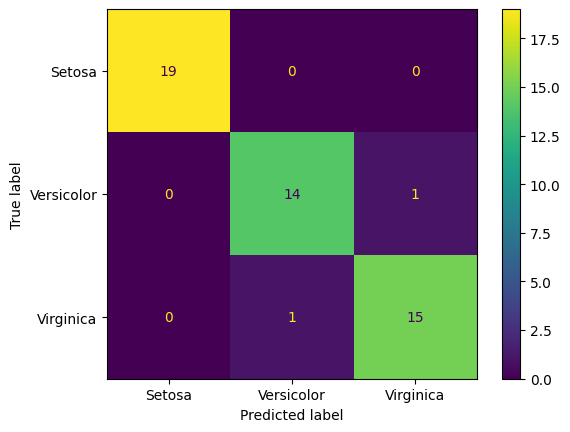

In [100]:
print(ConfusionMatrixDisplay.from_predictions(y_test,grid_pred))

In [102]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.93      0.93      0.93        15
   Virginica       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



## 6. SVM

In [107]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [108]:

svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(probability=True))
])

In [109]:
svm_param_grid = {
    "svc__C":      [0.1, 1.0, 10.0, 100.0],
    "svc__kernel": ["linear", "rbf", "poly"],
    "svc__gamma":  ["scale", "auto"],      # only used for rbf & poly
    "svc__degree": [2, 3],                 # only used for poly
}

In [110]:
svm_grid = GridSearchCV(
    estimator=svm_pipe,
    param_grid=svm_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [111]:
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svc__C': [0.1, 1.0, ...], 'svc__degree': [2, 3], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [112]:
print("Best SVM params:", svm_grid.best_params_)
print("Best CV accuracy:", svm_grid.best_score_)

Best SVM params: {'svc__C': 0.1, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best CV accuracy: 0.9400000000000001


In [129]:
y_pred = svm_grid.predict(X_test)
svm_acc = accuracy_score(y_test,y_pred)
svm_acc

0.98

In [130]:
print(confusion_matrix(y_test,y_pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


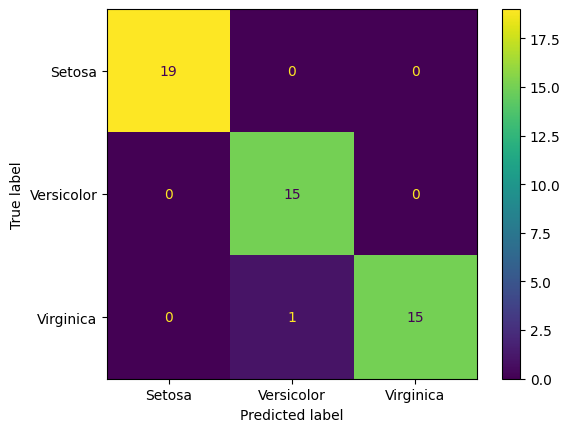

In [131]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

